# Importing the libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importing the dataset

In [42]:
df = pd.read_csv('/content/BigBasket Products.csv')

# Overview of the dataset

In [43]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [44]:
df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27555.000000,27555.000000,18929.000000
mean,13778.00000,322.514808,382.056664,3.943410
std,7954.58767,486.263116,581.730717,0.739063
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.000000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,12500.000000,12500.000000,5.000000


In [45]:
print(f'Number of Brands is',df["brand"].nunique())
print(f'Number of Categories is',df["category"].nunique())
print(f'Number of Sub-Categories is',df["sub_category"].nunique())
print(f'Number of Products is', df["product"].nunique())
print(f'Number of Types is', df["type"].nunique())

Number of Brands is 2313
Number of Categories is 11
Number of Sub-Categories is 90
Number of Products is 23540
Number of Types is 426


In [46]:
num_categories = df['category'].nunique()

category_subcategory_depth = df.groupby('category')['sub_category'].nunique()

category_product_depth = df.groupby('category')['product'].nunique()

num_categories, category_subcategory_depth, category_product_depth

(11,
 category
 Baby Care                    7
 Bakery, Cakes & Dairy        8
 Beauty & Hygiene            10
 Beverages                    6
 Cleaning & Household        10
 Eggs, Meat & Fish            6
 Foodgrains, Oil & Masala     9
 Fruits & Vegetables          7
 Gourmet & World Food        14
 Kitchen, Garden & Pets      10
 Snacks & Branded Foods      12
 Name: sub_category, dtype: int64,
 category
 Baby Care                    549
 Bakery, Cakes & Dairy        752
 Beauty & Hygiene            6839
 Beverages                    755
 Cleaning & Household        2411
 Eggs, Meat & Fish            338
 Foodgrains, Oil & Masala    1997
 Fruits & Vegetables          353
 Gourmet & World Food        4109
 Kitchen, Garden & Pets      3186
 Snacks & Branded Foods      2454
 Name: product, dtype: int64)

# Bar Charts for Using Different Features  

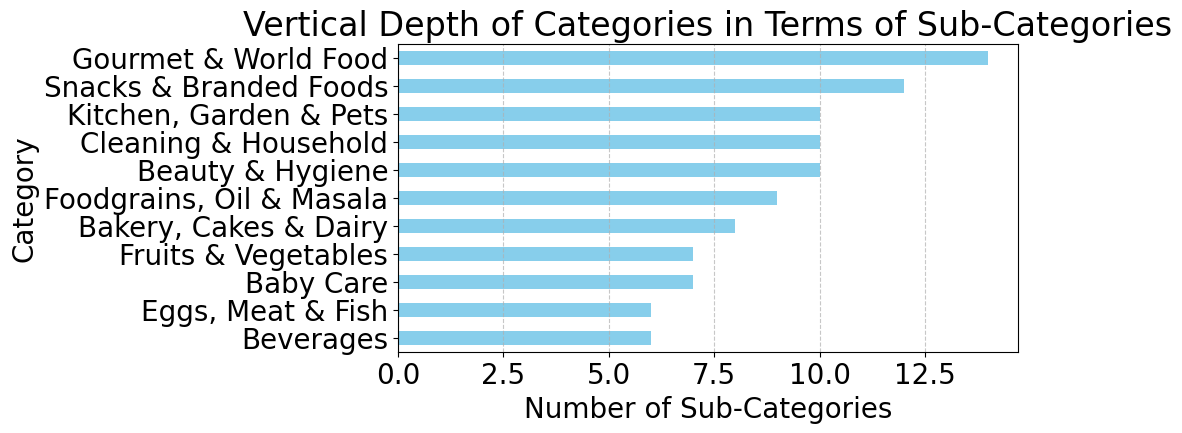

In [47]:
plt.figure(figsize=(8, 4))
category_subcategory_depth.sort_values().plot(kind='barh', color='skyblue')
plt.title('Vertical Depth of Categories in Terms of Sub-Categories')
plt.xlabel('Number of Sub-Categories')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

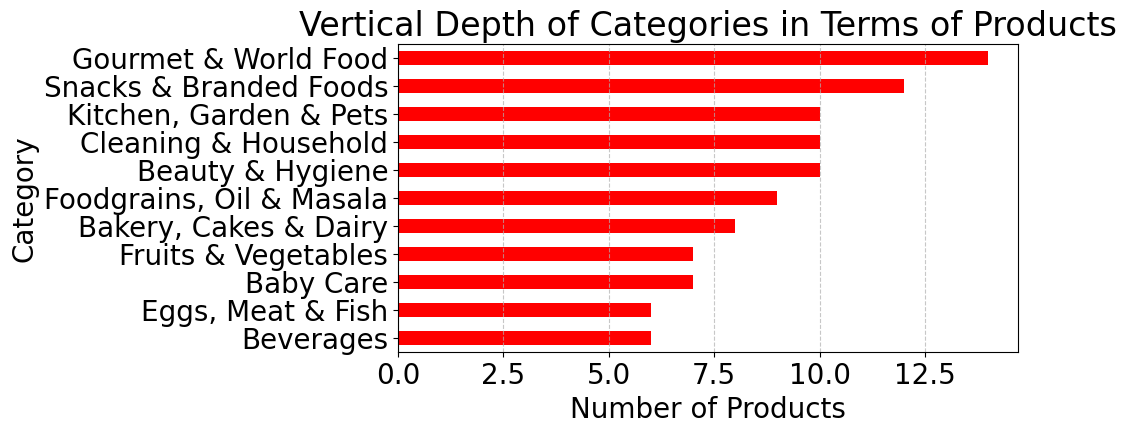

In [48]:
plt.figure(figsize=(8, 4))
category_subcategory_depth.sort_values().plot(kind='barh', color='red')
plt.title('Vertical Depth of Categories in Terms of Products')
plt.xlabel('Number of Products')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [49]:
counts = df['brand'].value_counts()

counts_df_brand = pd.DataFrame({'Brand Name':counts.index,'Counts':counts.values})[:10]
px.bar(data_frame=counts_df_brand,
 x='Brand Name',
 y='Counts',
 color='Counts',
 color_continuous_scale='blues',
 text_auto=True,
 title=f'Top 10 Brand Items based on Item Counts')

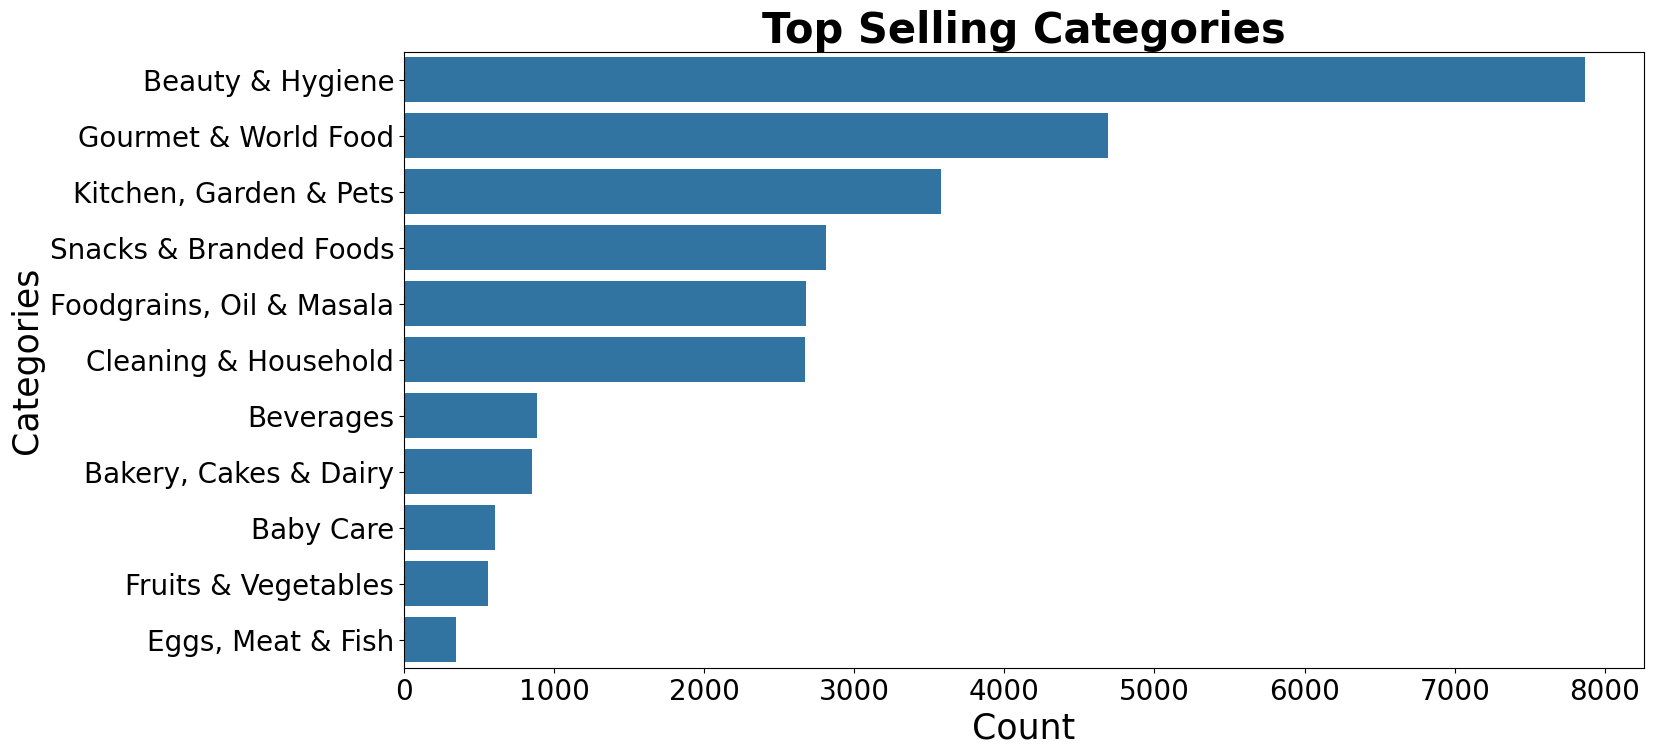

In [50]:
data = df.category.value_counts()
plt.figure(figsize=(16,8))
sns.barplot(x=data,y=data.index)
plt.xlabel('Count',fontdict={'fontsize': 25})
plt.ylabel('Categories',fontdict={'fontsize': 25})
plt.title('Top Selling Categories',fontweight="bold",fontdict={'fontsize': 30})
plt.rcParams['font.size'] = 15

# Histogram Plot

<Axes: xlabel='rating', ylabel='Count'>

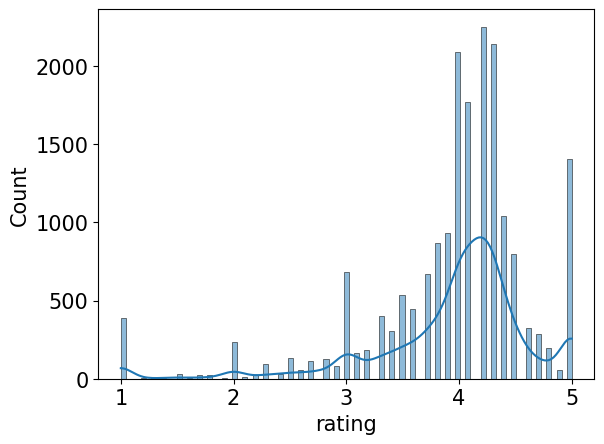

In [51]:
sns.histplot(df.rating, kde=True)

# Pie Plot

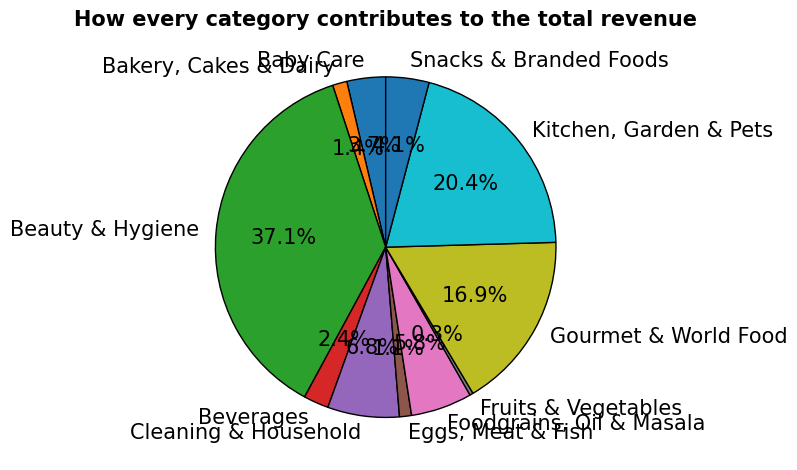

In [52]:
data = df.sale_price.groupby(df.category).sum()
plt.figure(figsize=(8,8))
plt.pie(x=data,labels=data.index,startangle=90,autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('How every category contributes to the total revenue',fontweight="bold",fontdict={'fontsize': 15})
plt.rcParams['font.size'] = 20
plt.tight_layout()

# Differnt Scatter Plots

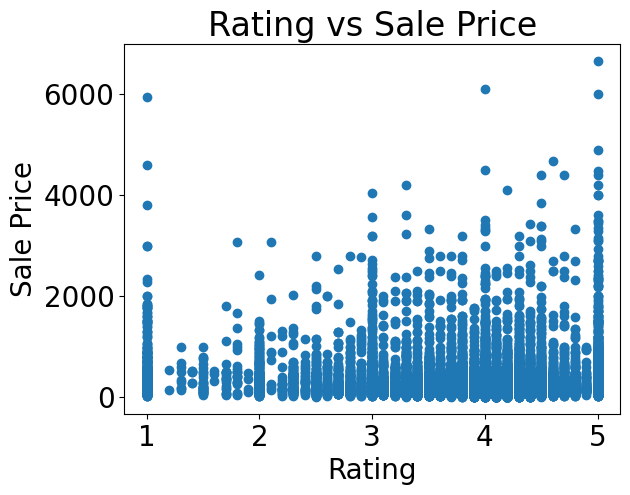

In [53]:
plt.scatter(df.rating, df.sale_price)
plt.title('Rating vs Sale Price')
plt.xlabel('Rating')
plt.ylabel('Sale Price')
plt.show()

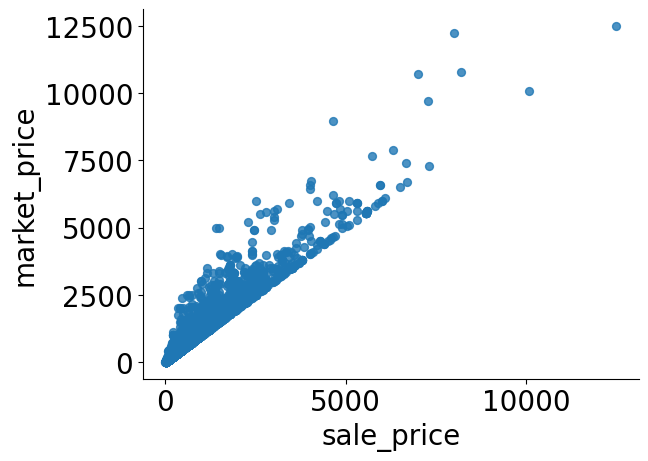

In [54]:
df.plot(kind='scatter', x='sale_price', y='market_price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)